In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/AML/AML_course/Project

/content/drive/MyDrive/AML/AML_course/Project


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import shutil
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import scipy.io
import json
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import random
from tqdm import tqdm
from modules.data_preprocessing import data_reallocation, create_datasets
from modules.train_classfier import train, test_eval


In [4]:
import gdown
url = "https://drive.google.com/drive/folders/1c2xufL1sNJHbQ3v3b5l1jmYx86ahDgLQ"
%cd /content
gdown.download_folder(url, output='flower102')

/content


Retrieving folder contents


Processing file 1NVV3x5bnHk0kDnxQuCtjJFrVdVSh96ID 102flowers.tgz
Processing file 1kW4gIHlC82lDDdPRNf-ib1go1ekM05mL cat_to_name.json
Processing file 1thBhdGC6oJywetBBiFcmh5OI7mX9DpGn imagelabels.mat
Processing file 1m8mSQlD27WR2vHp-PkiQ_17ts408xn10 setid.mat


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1NVV3x5bnHk0kDnxQuCtjJFrVdVSh96ID
From (redirected): https://drive.google.com/uc?id=1NVV3x5bnHk0kDnxQuCtjJFrVdVSh96ID&confirm=t&uuid=c640fe17-1a80-407d-89df-503291d3732f
To: /content/flower102/102flowers.tgz
100%|██████████| 345M/345M [00:03<00:00, 93.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kW4gIHlC82lDDdPRNf-ib1go1ekM05mL
To: /content/flower102/cat_to_name.json
100%|██████████| 2.22k/2.22k [00:00<00:00, 5.95MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1thBhdGC6oJywetBBiFcmh5OI7mX9DpGn
From (redirected): https://drive.google.com/uc?id=1thBhdGC6oJywetBBiFcmh5OI7mX9DpGn&confirm=t&uuid=532923f1-b5c4-43cb-be72-5cecfbbdc1ed
To: /content/flower102/imagelabels.mat
100%|██████████| 502/502 [00:00<00:00, 1.41MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1m8mSQlD27

['flower102/102flowers.tgz',
 'flower102/cat_to_name.json',
 'flower102/imagelabels.mat',
 'flower102/setid.mat']

In [5]:
import tarfile
source_path = "flower102/102flowers.tgz"
destination_path = "flower102"

with tarfile.open(source_path, "r:gz") as tar:
      tar.extractall(path=destination_path)

os.remove(source_path)

In [6]:
# Define paths
data_path = 'flower102'
images_path = os.path.join(data_path, 'jpg')
output_path = 'data'

data_reallocation(data_path,
                  images_path,
                  output_path)

train_dataset, val_dataset, test_dataset = create_datasets(output_path, batch_size=32)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Images reallocated successfully to folder data


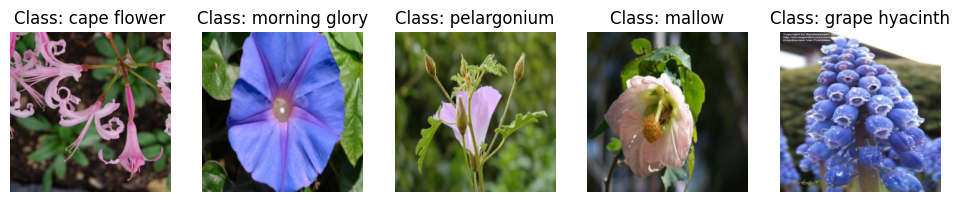

In [7]:
# plot 4 images from data
swapped_dict = {value: key for key, value in train_dataset.class_to_idx.items()}
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for ax in axes:
    picture_number = random.randint(0, len(train_dataset))
    image = train_dataset[picture_number][0].permute(1, 2, 0)
    #unnormalize
    image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    ax.imshow(image)
    ax.set_title(f"Class: {swapped_dict[train_dataset[picture_number][1]]}")
    ax.axis('off')


In [8]:
model = torchvision.models.resnet18(pretrained=True)
num_epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
optimizer = optim.Adam
criterion = nn.CrossEntropyLoss()
path_to_save_model = 'model.pth'
lr = 0.01
num_classes = len(train_loader.dataset.classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 113MB/s]


In [9]:
train(train_loader,
      val_loader,
      model = model,
      num_epochs=num_epochs,
      device = device,
      criterion=criterion,
      optimizer=optimizer,
      lr=lr,
      path_to_save_model=path_to_save_model,
      num_classes=num_classes)

start
start
start


KeyboardInterrupt: 

In [ ]:
test_eval(test_loader,
    model = model,
    device = device,
    path_to_save_model = path_to_save_model)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in tqdm(test_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)

# Calculate accuracy and F1-score for each class
class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
class_f1 = []

for i in range(num_classes):
  precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:,i]) > 0 else 0
  recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i,:]) > 0 else 0
  f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  class_f1.append(f1)



  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
# Find the class with the worst accuracy and F1-score
worst_accuracy_class = np.argmin(class_accuracy)
worst_f1_class = np.argmin(class_f1)

print(f"Class with worst accuracy: {worst_accuracy_class}, Accuracy: {class_accuracy[worst_accuracy_class]}")
print(f"Class with worst F1-score: {worst_f1_class}, F1-score: {class_f1[worst_f1_class]}")

# Find the classes it was mostly confused with
# For the class with the worst accuracy:
confusion_dist = cm[worst_accuracy_class]
top_confused_classes_acc = np.argsort(confusion_dist)[::-1][:4] # Get top 3
print(f"Top 3 classes confused with (accuracy): {top_confused_classes_acc}")


# For the class with the worst f1-score:
confusion_dist = cm[worst_f1_class]
top_confused_classes_f1 = np.argsort(confusion_dist)[::-1][:4] # Get top 3
print(f"Top 3 classes confused with (F1): {top_confused_classes_f1}")


Class with worst accuracy: 38, Accuracy: 0.1
Class with worst F1-score: 38, F1-score: 0.18181818181818182
Top 3 classes confused with (accuracy): [72 77 42 73]
Top 3 classes confused with (F1): [72 77 42 73]


AttributeError: 'Flowers102' object has no attribute 'classes'

In [ ]:
# prompt: remap classes to real names /content/data/flowers-102/imagelabels.mat

import scipy.io
mat = scipy.io.loadmat('/content/data/flowers-102/imagelabels.mat')

class_names = [f'class_{i}' for i in mat['labels'][0] - 1]


In [ ]:
class_names = [
    'angelonia', 'anemone', 'antirrhinum', 'aquilegia', 'armeria', 'asters', 'balsam',
    'begonia', 'bluebell', 'buttercup', 'cineraria', 'columbine', 'coreopsis', 'cornflower',
    'cyclamen', 'dahlia', 'daffodil', 'daisy', 'delphinium', 'geranium', 'gladiolus', 'hellebore',
    'hollyhock', 'hydrangea', 'impatiens', 'iris', 'jasmine', 'kenilworth', 'larkspur', 'lilac',
    'lily', 'lupine', 'magnolia', 'marigold', 'morning glory', 'narcissus', 'pansy', 'passion flower',
    'peony', 'petunia', 'phlox', 'poppy', 'primrose', 'primula', 'rudbeckia', 'snowdrop', 'sunflower',
    'sweet pea', 'tiger lily', 'torenia', 'tulip', 'violet', 'wallflower', 'water lily', 'windflower'
]

In [ ]:
# Find positions of class 35 in all_labels
class_35_positions = [i for i, label in enumerate(all_labels) if label == 35]

# Get all predictions for those positions
preds_for_class_35 = [all_preds[i] for i in class_35_positions]

print(f"Positions of class 35 in all_labels: {class_35_positions}")
print(f"Predictions for those positions: {preds_for_class_35}")

Positions of class 35 in all_labels: [317, 450, 749]
Predictions for those positions: [35, 36, 40]


In [ ]:

# Load the pre-trained ResNet50 model
model = torchvision.models.resnet50(pretrained=False) #pretrained=False because we load our weights
num_classes = 102
model.fc = nn.Linear(model.fc.in_features, num_classes)


# Load the model weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load('/content/drive/MyDrive/AML/initial_model_weights.pth', map_location=device))
model.to(device)

# Set the model to evaluation mode
model.eval()

# Initialize variables to store predictions and true labels
all_preds = []
all_labels = []

# Iterate over the test data loader
with torch.no_grad():
  for images, labels in tqdm(test_loader):
    images = images.to(device)
    labels = labels.to(device)

    # Get predictions
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Store predictions and true labels
    all_preds.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Calculate metrics (e.g., accuracy)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy}")

print(classification_report(all_labels, all_preds))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-20-21e61c5f15a8>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions

  0%|          | 0/193 [00:00<?, ?it/s]

KeyboardInterrupt: 